# 数据预处理

In [31]:
# import from csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

random.seed(50)

# Importing the dataset
dataset = pd.read_csv('./datasets/SyntheticFinancialDatasets/syn_data.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)

In [32]:
# sample the data
# sample_dataframe = dataset
sample_dataframe = dataset.sample(n=1000000)

In [33]:
sample_dataframe.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000
mean,243.507534,1.798987e+05,8.333002e+05,8.543522e+05,1.100160e+06,1.224767e+06,0.001296
std,142.309127,5.984509e+05,2.882831e+06,2.918368e+06,3.455588e+06,3.726884e+06,0.035977
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,156.000000,1.340731e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,239.000000,7.473558e+04,1.414000e+04,0.000000e+00,1.326141e+05,2.143669e+05,0.000000
75%,334.000000,2.085080e+05,1.073672e+05,1.441765e+05,9.383212e+05,1.104906e+06,0.000000
max,743.000000,5.743662e+07,5.731626e+07,4.731626e+07,3.551855e+08,3.555534e+08,1.000000


In [34]:
sample_dataframe.head(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
4754342,333,CASH_IN,110902.82,2411641.88,2522544.69,989526.02,878623.2,0
5855354,402,CASH_IN,420458.81,6873143.04,7293601.84,10463678.00,10043219.2,0
1538563,154,PAYMENT,7165.89,11208.00,4042.11,0.00,0.0,0


In [35]:
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

print(sample_dataframe.isFraud.value_counts())

0    998704
1      1296
Name: isFraud, dtype: int64


In [36]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# LabelEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])

# OneHotEncoder
onehotencoder = ColumnTransformer([("type", OneHotEncoder(), [1])], remainder = 'passthrough')
X = onehotencoder.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [37]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# positive and negative sets counts
counts = np.unique(y_train, return_counts=True)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0, 1], dtype=int64), array([699074,    926], dtype=int64))


## Visualisations 

In [13]:
from pandas import DataFrame
# x_train_DataFrame = DataFrame(X_train, index=None,columns = ['type1', 'type2', 'type3', 'type4', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
x_train_DataFrame = DataFrame(X_train, index=None,columns = ['type1', 'type2', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
x_train_DataFrame.head(3)

,type1,type2,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.123169,-0.274568,-0.748399,-0.066890,-0.163484,-0.482770,-0.198628,-0.201445
1,-0.123169,-0.274568,0.621942,-0.219144,-0.356132,-0.694909,-0.198628,-0.278643
2,-0.123169,-0.274568,0.918046,-0.092261,0.028711,0.590080,-0.198628,-0.214309


**Pearson Correlation Heatmap**

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

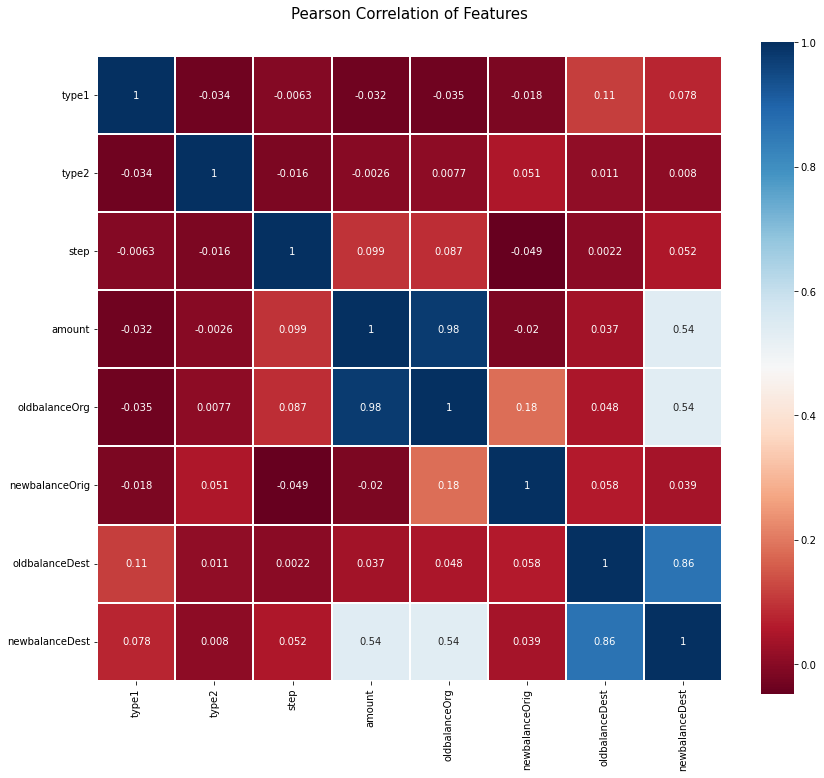

In [14]:
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train_DataFrame.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Pairplots**

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

C:\Users\fzkuji\.conda\envs\Finance\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


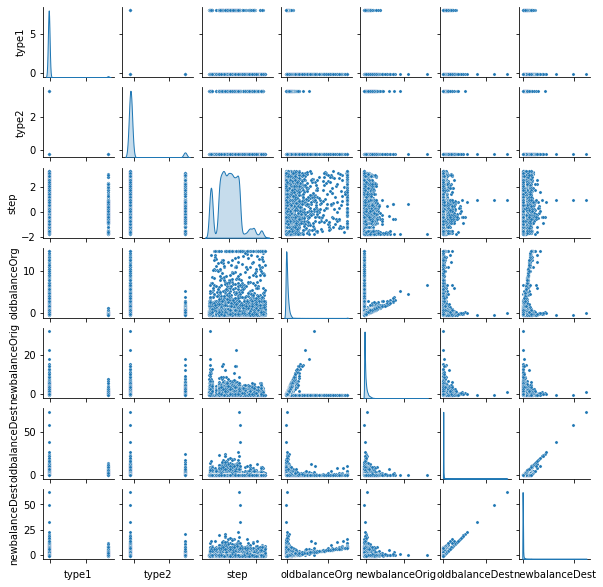

In [15]:
g = sns.pairplot(x_train_DataFrame[['type1', 'type2', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']], palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

# Singe model

## SVM

In [39]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score

In [327]:
# find best parameters with GridsearchCV
# no ploy no degree
# parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'degree':[2, 3, 4], 'gamma':{'scale', 'auto'}, 'class_weight':{'None', 'balanced'}}
parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'gamma':('scale', 'auto'), 'class_weight':(None, 'balanced')}

model = SVC()
clf = GridSearchCV(model, parameters)
result = clf.fit(X_train, y_train)
print(result.best_score_,result.best_params_)

0.9988142857142857

{'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

In [48]:
# training with best score

# solve imbalanced learning
# ada = ADASYN()
# X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
# count = np.unique(y_resampled, return_counts=True)

# Create a pipeline training

# best_model = make_pipeline(ADASYN(), SVC(kernel='linear', gamma='scale', class_weight=None))
# best_model.fit(X_train, y_train)

# Normal training
# best_model = SVC(kernel='linear', gamma='scale', class_weight=None)
best_model = SVC(C=1500, kernel='poly', degree=3)
best_model.fit(X_train, y_train)

SVC(C=1500, kernel='poly')

In [49]:
# Classify and report the results
print(best_model.score(X_test, y_test))
print(classification_report_imbalanced(y_test, best_model.predict(X_test)))

0.9996066666666666
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.69      1.00      0.83      0.71    149820
          1       0.98      0.69      1.00      0.81      0.83      0.67       180

avg / total       1.00      1.00      0.69      1.00      0.83      0.71    150000



In [50]:
# Making the Confusion Matrix
cm = confusion_matrix(y_val, best_model.predict(X_val))
roc = roc_auc_score(y_val, best_model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, best_model.predict(X_val))
roc_auc = auc(fpr,tpr)

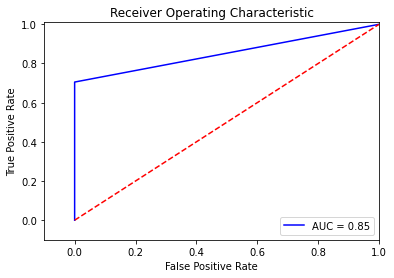

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## LR
使用class_weight='balanced'，召回率达到96%，但是精确率不到1%。

如果使用默认的class_weight，则精度达到97%，但是召回率不到1%

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
# find best parameters with GridsearchCV
parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 
              'fit_intercept':(True, False), 
              'class_weight':(None, 'balanced'), 
              'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 
              'max_iter':[1000], 
              'multi_class':['ovr'],
              'warm_start':[True],
              'n_jobs':[8],
              'l1_ratio':[0.5, None]
             }

model = LogisticRegression()
clf = GridSearchCV(model, parameters)
result = clf.fit(X_train, y_train)
print(result.best_score_,result.best_params_)

0.9993571428571428

{'class_weight': None, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'multi_class': 'ovr', 'n_jobs': 8, 'penalty': 'none', 'solver': 'lbfgs', 'warm_start': True}

In [38]:
# model_LR = LogisticRegression(penalty='l2', class_weight='balanced', random_state=1, solver='lbfgs')
best_model_LR = LogisticRegression(fit_intercept=True, max_iter=1000, penalty='none', random_state=1, solver='lbfgs', warm_start=True, l1_ratio=None)
# best_model_LR = LogisticRegression()
best_model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none', random_state=1,
                   warm_start=True)

In [39]:
# Classify and report the results
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, best_model_LR.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      8661
          1       1.00      1.00      1.00      1.00      1.00      1.00       344

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      9005



In [26]:
# Making the Confusion Matrix
cm = confusion_matrix(y_val, best_model_LR.predict(X_val))
roc = roc_auc_score(y_val, best_model_LR.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, best_model_LR.predict(X_val))
roc_auc = auc(fpr,tpr)

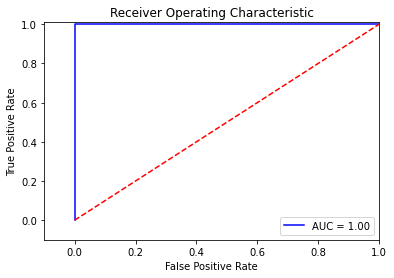

In [27]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## RF

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [322]:
# find best parameters with GridsearchCV
parameters = {'n_estimators':[50, 100, 150], 
              'criterion':("gini", "entropy"), 
              'max_features':["auto", "log2", None],
              'bootstrap':[True, False],
              'oob_score':[True, False],
              'n_jobs':[8],
              'class_weight':["balanced", "balanced_subsample", None]
             }

model = RandomForestClassifier()
clf = GridSearchCV(model, parameters)
result = clf.fit(X_train, y_train)
print(result.best_score_,result.best_params_)

0.9995619047619048

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150, 'n_jobs': 8, 'oob_score': False}

In [27]:
best_model_RF = RandomForestClassifier(n_estimators=150, criterion='gini', max_features="auto", class_weight=None, random_state=1)
best_model_RF.fit(X_train, y_train)

# best_model_RF = RandomForestClassifier(n_estimators=10, random_state=1)
# best_model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=1)

In [28]:
# Classify and report the results
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, best_model_RF.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.75      1.00      0.87      0.77    149811
          1       0.99      0.75      1.00      0.85      0.87      0.73       189

avg / total       1.00      1.00      0.75      1.00      0.87      0.77    150000



In [29]:
# Making the Confusion Matrix
cm = confusion_matrix(y_val, best_model_RF.predict(X_val))
roc = roc_auc_score(y_val, best_model_RF.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, best_model_RF.predict(X_val))
roc_auc = auc(fpr,tpr)

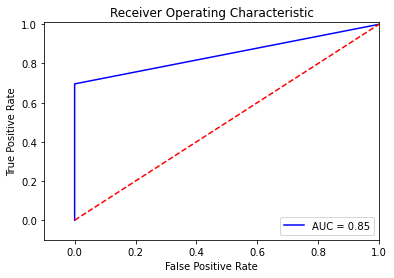

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ensembling & Stacking models

Finally after that brief whirlwind detour with regards to feature engineering and formatting, we finally arrive at the meat and gist of the this notebook.

Creating a Stacking ensemble!

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from imblearn.metrics import classification_report_imbalanced

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00     44941
          1       0.74      1.00      1.00      0.85      1.00      1.00        59

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     45000



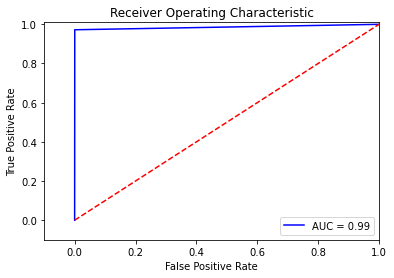

In [27]:
estimators = [
    ('svr_1', SVC(kernel='linear', gamma='scale', class_weight=None)),
    ('svr', SVC(kernel='poly', degree=4, gamma='auto')),
    ('lr_1', LogisticRegression(penalty='l2', class_weight='balanced', random_state=1, solver='lbfgs', max_iter=1000)),
    ('lr_2', LogisticRegression(penalty='l2', class_weight=None, random_state=1, solver='lbfgs', max_iter=1000)),
    ('lr_3', LogisticRegression(fit_intercept=True, max_iter=1000, penalty='none', random_state=1, solver='lbfgs', warm_start=True, l1_ratio=None)),
    ('rf', RandomForestClassifier(n_estimators=150, criterion='entropy', max_features="auto", class_weight=None, random_state=1)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier(), n_jobs=8
)

ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
count = np.unique(y_resampled, return_counts=True)

model = make_pipeline(ADASYN(), clf)

model.fit(X_train, y_train).score(X_test, y_test)

print(classification_report_imbalanced(y_test, model.predict(X_test)))

# Making the Confusion Matrix
cm = confusion_matrix(y_val, model.predict(X_val))
roc = roc_auc_score(y_val, model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict(X_val))
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      8661
          1       1.00      1.00      1.00      1.00      1.00      1.00       344

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      9005



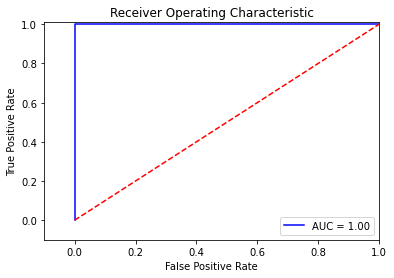

In [18]:
estimators = [
    ('svr_1', SVC(kernel='linear', gamma='scale', class_weight=None)),
    ('lr_3', LogisticRegression(fit_intercept=True, max_iter=1000, penalty='none', random_state=1, solver='lbfgs', warm_start=True, l1_ratio=None)),
    ('rf', RandomForestClassifier(n_estimators=150, criterion='entropy', max_features="auto", class_weight=None, random_state=1)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier()
)

clf.fit(X_train, y_train).score(X_test, y_test)

print(classification_report_imbalanced(y_test, clf.predict(X_test)))

# Making the Confusion Matrix
cm = confusion_matrix(y_val, clf.predict(X_val))
roc = roc_auc_score(y_val, clf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(X_val))
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      8661
          1       1.00      1.00      1.00      1.00      1.00      1.00       344

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      9005



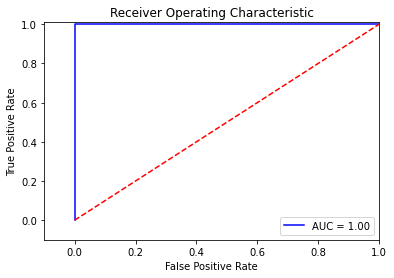

In [19]:
estimators = [
    ('svr_1', SVC(kernel='linear', gamma='scale', class_weight=None)),
    ('lr_3', LogisticRegression(fit_intercept=True, max_iter=1000, penalty='none', random_state=1, solver='lbfgs', warm_start=True, l1_ratio=None)),
    ('rf', RandomForestClassifier(n_estimators=150, criterion='entropy', max_features="auto", class_weight=None, random_state=1)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

print(classification_report_imbalanced(y_test, clf.predict(X_test)))

# Making the Confusion Matrix
cm = confusion_matrix(y_val, clf.predict(X_val))
roc = roc_auc_score(y_val, clf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(X_val))
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00      8661
          1       1.00      1.00      1.00      1.00      1.00      1.00       344

avg / total       1.00      1.00      1.00      1.00      1.00      1.00      9005



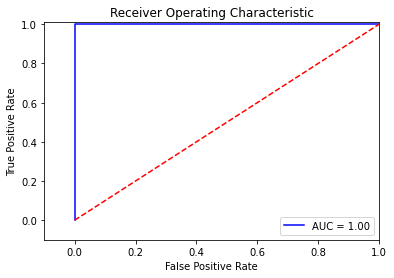

In [20]:
estimators = [
    ('svr_1', SVC(kernel='linear', gamma='scale', class_weight=None)),
    ('lr_3', LogisticRegression(fit_intercept=True, max_iter=1000, penalty='none', random_state=1, solver='lbfgs', warm_start=True, l1_ratio=None)),
    ('rf', RandomForestClassifier(n_estimators=150, criterion='entropy', max_features="auto", class_weight=None, random_state=1)),
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=SVC()
)

clf.fit(X_train, y_train).score(X_test, y_test)

print(classification_report_imbalanced(y_test, clf.predict(X_test)))

# Making the Confusion Matrix
cm = confusion_matrix(y_val, clf.predict(X_val))
roc = roc_auc_score(y_val, clf.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(X_val))
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()